# 機械学習手法のパイプライン化

In [9]:
%matplotlib inline
from IPython.display import Image
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.shape

(569, 32)

In [5]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])

array([1, 0])

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.20, random_state=1)

---
## 標準化+PCA+ロジスティック回帰

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.947


fitする時とpredictする時で内部で呼び出されているメソッドが違うことに気をつける。下にパイプラインの動作の様子が分かる図を示す。

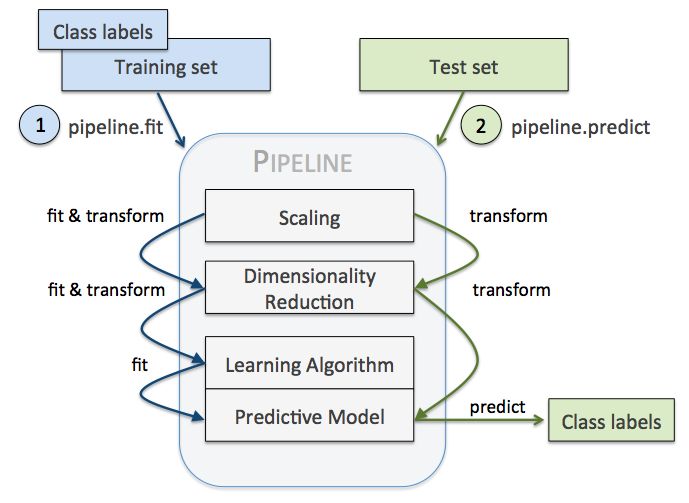

In [12]:
Image(filename='./images/06_01.png', width=400) 

---
# クロスバリデーション

K分割クロスバリデーションは訓練データセットをK個のグループに分け、そのうちの一つをテストデータグループとしてモデルのパラメータ検証を行う手法。
分割数は多くなればなるほど、検証によって得られたパラメータの妥当性は上がるが、計算コストは上がる。テストデータを一つずつ分割していくのは、高妥当性、高コストの究極で、LOOCVと呼ばれる。

ここで注意点として、モデルの検証にテストデータを用いてはいけないということがある。また、クロスバリデーションによって得られた最適なパラメータを用いて、バリデーションセットも一緒に、つまり訓練データ全てを用いて学習させる必要がある。（ここでもテストデータを用いて学習するのはNG。適切なモデル評価ではなくなってしまう。）

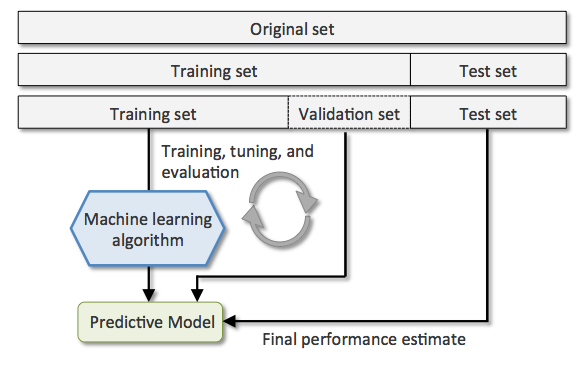

In [11]:
Image(filename='./images/06_02.png', width=500) 